# Phase 2 Project : King County Housing Sales Data Set -Linear Regression

Author: Jhonathan David Herrera-Shaikh
* Student pace: Flex
* Scheduled project review date/time: October, 2022
* Instructor name: 
* Blog post URL:www.jhonathanddavid.com


# Background

In this notebook, an analysis of King County sales data in the United States for years 2014-2015 will be conducted. The purpose of the analysis is to derive conclusions for business decision making purposes, affecting current homeowners and prospective buyers of this specific area. King county,  is one of three Washington state counties that include Seattle, Bellevue and Tacoma area.  It covers an area of  of approximately 39 towns and cities. U.S Census Bureau stats indicate the county has a population of approximately 2.2 million people as of 2020. 

# Business Understanding & Business Problem

Understanding that my business stakeholder can be a real estate agency, who would want to advice both buyers and sellers on this market, it is important to note that in this type of business, both buyers and sellers are interested in price. Therefore, it is important to understand the database first, navigage its features, identify what other categories besides price are availble to try to define and predict what exactly is the best correlation to price. 


# Database Analysis

## Download data bases and libraries

In [1]:
#importing libraries
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from bs4 import BeautifulSoup
import json
import requests

import folium

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder


import scipy.stats as stats

import pylab

%matplotlib inline



In [2]:
#loading database
df= pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


## Exploring and cleaning the database

In [3]:
#exploring the head and tail
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287
21596,1523300157,10/15/2014,325000.00,2,0.75,1020,1076,2.00,NO,NONE,...,7 Average,1020,0.0,2008,0.00,98144,47.59,-122.30,1020,1357


In [5]:
#understanding the shaple
df.shape

(21597, 21)

In [6]:
#understanding columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [17]:
#checking the null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#a statistical view 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


Now that I know what the database looks like, how big is it, the number of rows and columns, the classification of columns,  the kind of data in it overall including a brief os statiscal values and null values, my next step is to clean the data base. 

### Data initial cleaning of null values, dropping columns

In [8]:
#starting with dropping rows with null values
df= df.dropna(axis=0, how='any')
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#dropped columns: df= df.drop(columns = ["id", "lat","long","sqft_living15","sqft_lot15"])

In [10]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
5,7237550310,5/12/2014,1230000.00,4,4.50,5420,101930,1.00,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.00,98053,47.66,-122.00,4760,101930
6,1321400060,6/27/2014,257500.00,3,2.25,1715,6819,2.00,NO,NONE,...,7 Average,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.00,3,2.50,1310,1294,2.00,NO,NONE,...,8 Good,1180,130.0,2008,0.00,98116,47.58,-122.41,1330,1265
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007


In [12]:
#confirming
df.duplicated().sum()

0

### Replacing strings with integers

In [ ]:
df['view1']= df['view'].replace({'NONE': 0, 'FAIR': 1, 'Average':2, 'Good':3, 'Excellent':4})

In [37]:
df['waterfront1'] = df['waterfront'].replace({'YES':0, 'NO':1})

In [39]:
df['condition1'] = df ['condition'].replace({'Poor':0, 'FAIR':1, 'Average':2, 'Good':3, 'Very Good':4})

### Modifying to columnumerical 

In [ ]:
#splitting and going numerical for 'grade' column will allow better stat analysis
df["Grade1"]= df ["grade"].str.split().apply(lambda x:x[0])
df["Grade1"]= pd.to_numeric(df["Grade1"])

### Dropping unnecessary columns


In [14]:
df = df.drop(columns=['view','waterfront','grade'])

### Statiscal findings

In [15]:
#square footage understanding overall
df['sqft_living'].describe()

count     835.00
mean     2917.57
std      1608.54
min       370.00
25%      1785.00
50%      2570.00
75%      3756.50
max     13540.00
Name: sqft_living, dtype: float64

In [16]:
#looking at the zipcodes in King County
df['zipcode'].value_counts()

98001    43
98092    41
98030    37
98006    33
98053    29
         ..
98007     2
98108     2
98155     2
98148     1
98188     1
Name: zipcode, Length: 70, dtype: int64

In [17]:
#statistical correlations to price
df.corr()['price'].sort_values(ascending=False)


price            1.00
sqft_living      0.79
sqft_above       0.72
Grade1           0.68
bathrooms        0.67
sqft_living15    0.55
bedrooms         0.41
lat              0.33
floors           0.21
yr_renovated     0.18
sqft_lot         0.13
sqft_lot15       0.11
long             0.06
id              -0.02
zipcode         -0.05
yr_built        -0.05
Name: price, dtype: float64

The highest correlation to price can be found in square feet, grade and bathrooms. 

### Observing correlations on a heat map

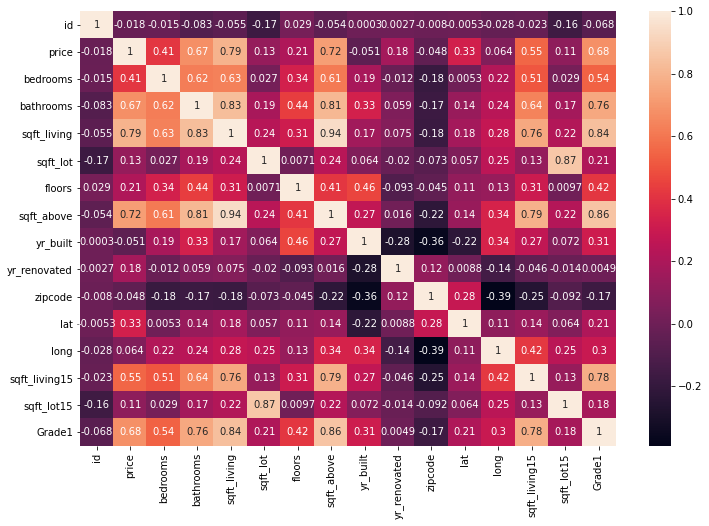

In [18]:
# generate heatmap to display correlations
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True);

# Regression analysis and visualizations

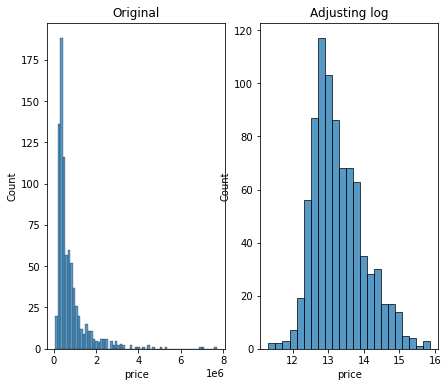

In [19]:
fig, ax = plt.subplots(1, 2,figsize=(7,6))

sns.histplot(df['price'], ax=ax[0])
ax[0].set_title('Original')
sns.histplot(np.log(df['price']), ax=ax[1])
ax[1].set_title('Adjusting log')
plt.show()

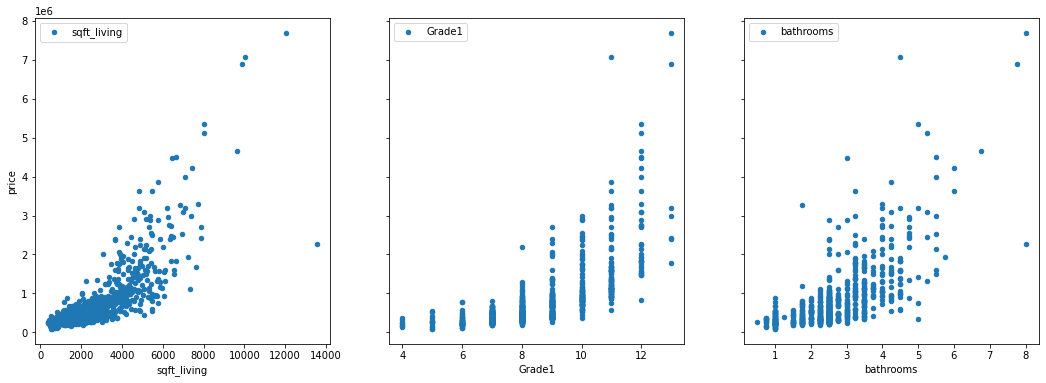

In [23]:
# visualize the relationship between the predictors and the target (price) using scatterplots
fig, axs= plt.subplots (1,3, sharey= True, figsize=(18,6))
for idx, channel in enumerate (['sqft_living', 'Grade1', 'bathrooms']):
    df.plot(kind= 'scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

In [36]:
# look for the outlier on the far right of sf living
df.loc[df['sqft_living']== 13540].T

,12764
id,1225069038
date,5/5/2014
price,2280000.00
bedrooms,7
bathrooms,8.00
sqft_living,13540
sqft_lot,307752
floors,3.00
condition,Average
sqft_above,9410


In [37]:
# drop this record by using the record the index
df.drop(12764, inplace=True)

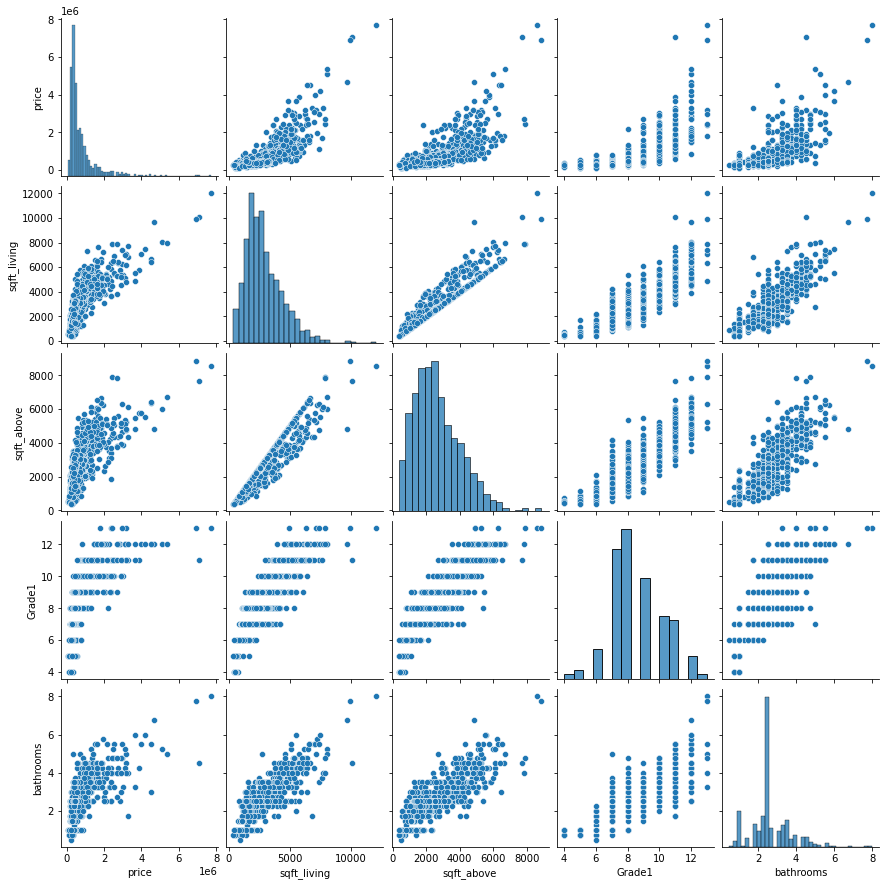

In [48]:
#exploring other correlations
df_pairplot = df[['price','sqft_living','sqft_above','Grade1','bathrooms']]
sns.pairplot(df_pairplot)
plt.show()

It can be concluded that the highest correlation to price are sqft_living, sqft_above,grade 1 and bathrooms.

Visualizing these relationships we can see the linearity. We can take these relationships and run the model.
the first one I would like to pick is sqft_living since it is the most linear to me. 

### Running a simple regression in Stats model with SF as a predictor

In [30]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
# build the formula 
f = 'price~sqft_living'

# create a fitted model in one line
model=smf.ols(formula=f, data=df ).fit()


### Regression Diagnostics Summary

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     1423.
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          2.21e-182
Time:                        16:08:37   Log-Likelihood:                -12127.
No. Observations:                 835   AIC:                         2.426e+04
Df Residuals:                     833   BIC:                         2.427e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.755e+05   3.53e+04    -10.648      0.000   -4.45e+05   -3.06e+05
sqft_living   399.3236     10.587     37.719      0.000     378.544     420.103
==============================================================================
Omnibus:                      395.468   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4905.344
Skew:                           1.820   Prob(JB):                         0.00
Kurtosis:                      14.302   Cond. No.                     6.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Drawing a prediction line X(square feet living) and Y(price)

   sqft_living
0          370
1        13540
0   -227744.63
1   5031347.07
dtype: float64


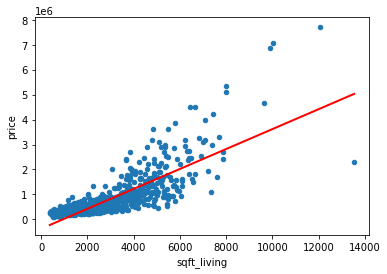

In [32]:
# create a DataFrame with the minimum and maximum values of sf
X_new=pd.DataFrame({'sqft_living': [df.sqft_living.min(), df.sqft_living.max()]})
print(X_new.head())
# make predictions for those x values and store them
preds= model.predict(X_new)
print(preds)

# first, plot the observed data and the least squares line
df.plot(kind= 'scatter', x='sqft_living', y='price')
plt.plot(X_new, preds, c='red', linewidth =2)
plt.show()

### Visualize error term for variance and heteroscedasticy

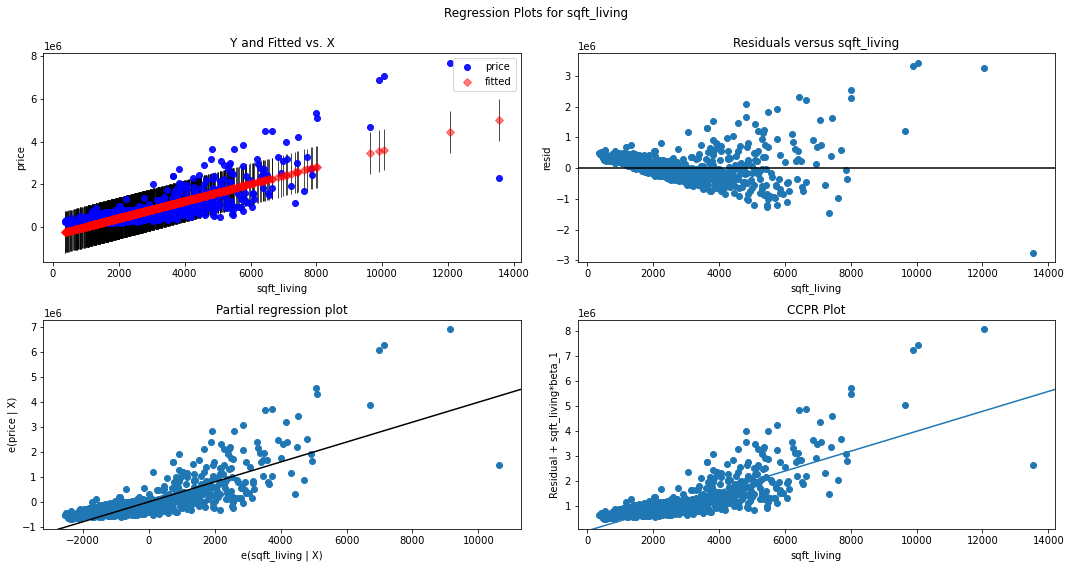

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

### Checking for normality assumptions by creating QQ plots

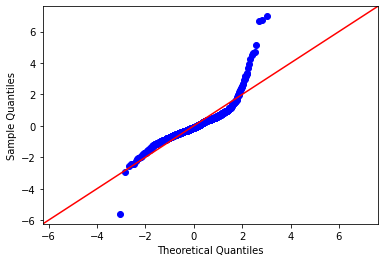

In [35]:
# Code for QQ-plot here
import scipy.stats as stats
residuals =model.resid
sm.graphics.qqplot (residuals, dist=stats.norm, line='45', fit=True)
plt.show()

### Repeating the above also for Grade as a predictor

R-Squared 0.4652008564849478
Intercept   -1981572.05
Grade1        325851.16
dtype: float64


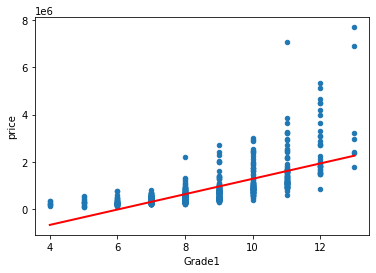

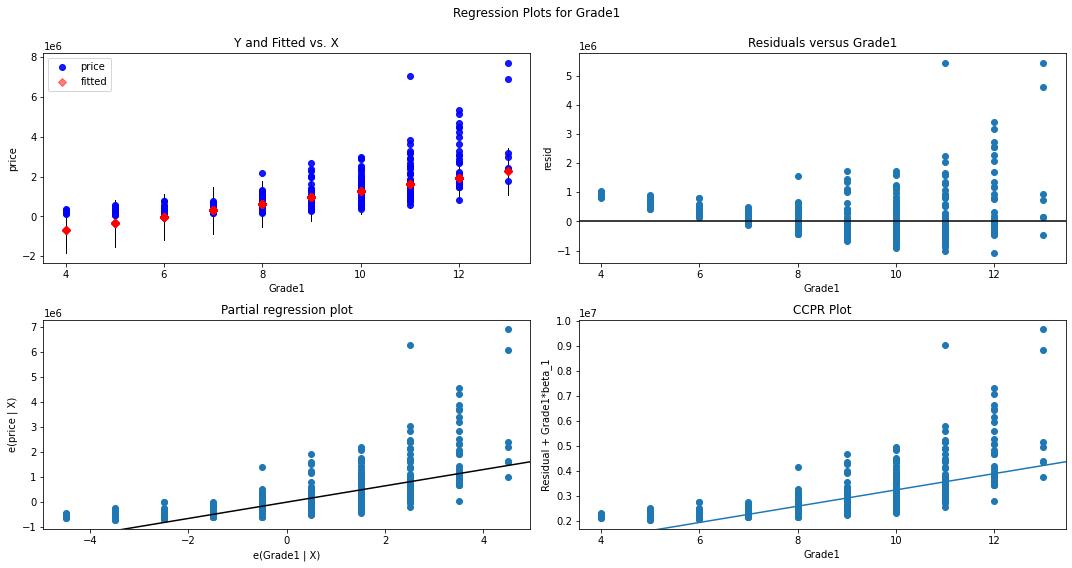

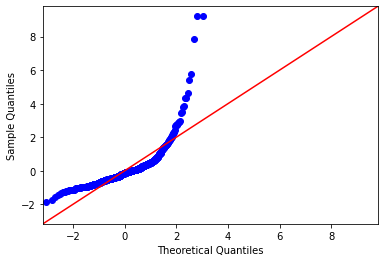

In [46]:
# code for model, prediction line plot, heteroscedasticity check and QQ normality check here
#step 1 through 3 is looking at database as a whole.
#Step 4 run Simple regression on radio only, just we did on TV only
f='price~Grade1'
model= smf.ols(formula=f, data=df).fit()
print ('R-Squared',model.rsquared)
print (model.params)
#get regression diagnostics
model.summary()
#Step 6 Draw a prediction line on scatter plot
X_new= pd.DataFrame({'Grade1':[df.Grade1.min(),df.Grade1.max()]});
preds= model.predict(X_new)
df.plot(kind='scatter', x='Grade1', y='price');
plt.plot(X_new,preds, c='red', linewidth=2);
plt.show()
#Visualize error term for variance Heteroscedasticity
fig= plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Grade1", fig=fig)
plt.show()
#Normality check with QQ Plot
import scipy.stats as stats
residuals= model.resid
fig=sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

### Exploring more Correlations & Regression

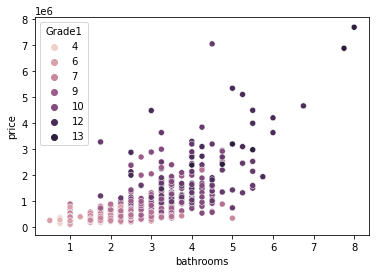

In [56]:
sns.scatterplot(data =df,x = 'bathrooms',y= 'price',hue ='Grade1');

number of bathrooms is positively correlated to price and it also helps us to conclude that the better the grade of a house, the more expensive it is

### Creating X in a train and test models

In [58]:
X = df[['sqft_living','sqft_above','bathrooms','bedrooms','Grade1']]
y = df['price']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
sqft = LinearRegression()
sqft.fit(X_train[['sqft_living']], y_train)
sqft.score(X_train[['sqft_living']], y_train)
y_hat_train = sqft.predict(X_train[['sqft_living']])
y_hat_test = sqft.predict(X_test[['sqft_living']])

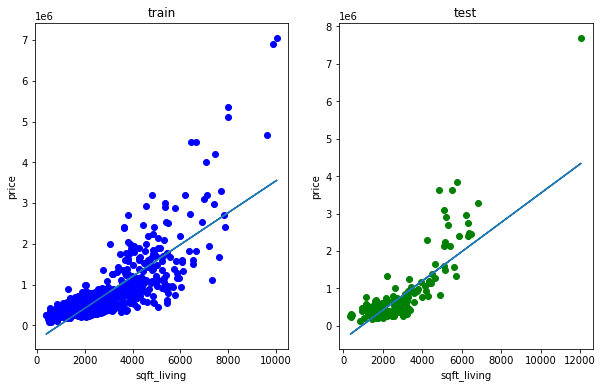

In [61]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(X_train[['sqft_living']], y_train, color = "blue")
plt.plot(X_train[['sqft_living']] ,y_hat_train)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('train')

plt.subplot(1,2,2)
plt.scatter(X_test[['sqft_living']], y_test, color = "green")
plt.plot(X_test[['sqft_living']] ,y_hat_test)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('test');

    Both train and set with linear correlation

In [75]:
reg = sm.add_constant(X, has_constant='add')
model = sm.OLS(y, X)
result1 = model.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              803.4
Date:                Sat, 29 Oct 2022   Prob (F-statistic):                   6.86e-315
Time:                        17:54:14   Log-Likelihood:                         -12070.
No. Observations:                 834   AIC:                                  2.415e+04
Df Residuals:                     829   BIC:                                  2.417e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   563.3322     32.620     17.270      0.000     499.305     627.359
sqft_above   -151.8250     36.106     -4.205      0.000    -222.695     -80.955
bathrooms    7.487e+04   3.03e+04      2.470      0.014    1.54e+04    1.34e+05
bedrooms    -1.476e+05   1.96e+04     -7.521      0.000   -1.86e+05   -1.09e+05
Grade1      -1.164e+04   1.01e+04     -1.147      0.252   -3.16e+04    8280.837
==============================================================================
Omnibus:                      368.835   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3688.194
Skew:                           1.736   Prob(JB):                         0.00
Kurtosis:                      12.699   Cond. No.                     8.51e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-Squared indicates almost 83% can be explained by the model. 
The p-value less than 5% so we can reject null hypothesis and say that this model is statistically significant. 

### Checking the Normality Residual pattern

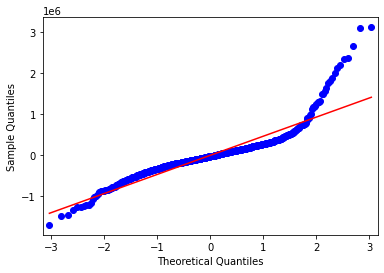

In [76]:
qqplot = sm.qqplot(result1.resid,line ='s',dist=stats.norm)

### Distributing the Data Normally

In [79]:
h = np.log(df['price'])
reg = sm.add_constant(X, has_constant='add')
model = sm.OLS(h, X)
result2 = model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.295e+04
Date:                Sat, 29 Oct 2022   Prob (F-statistic):                        0.00
Time:                        18:01:20   Log-Likelihood:                         -1518.7
No. Observations:                 834   AIC:                                      3047.
Df Residuals:                     829   BIC:                                      3071.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living    -0.0004      0.000     -3.871      0.000      -0.001      -0.000
sqft_above     -0.0010      0.000     -8.527      0.000      -0.001      -0.001
bathrooms       0.0531      0.097      0.547      0.585      -0.138       0.244
bedrooms        0.7180      0.063     11.415      0.000       0.595       0.841
Grade1          1.6621      0.033     51.100      0.000       1.598       1.726
==============================================================================
Omnibus:                       55.755   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.390
Skew:                           0.562   Prob(JB):                     4.26e-17
Kurtosis:                       3.953   Cond. No.                     8.51e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

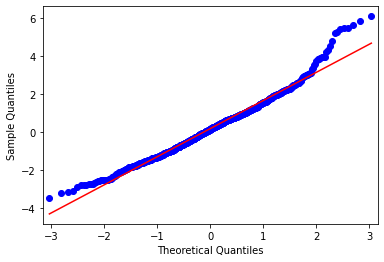

In [80]:
qqplot = sm.qqplot(result2.resid,line ='s',dist=stats.norm)

The R-Squared at 98% when the data is normally distributed

# Conclusion

The model that I've constructed provides understanding of the relationships of features to price. It explains more than 83% of the sales prices. It is clear that that for people wanting to buy or wanting to sell in King's County, the  main factor in affecting house value is the square footage. 